In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from connection_complexity.data.raw_data.EDF.edf_helpers import read_edf
from eeg_prep.preprocess.ieeg import preprocess_ieeg

import os

In [2]:
np.diff([1,1.5,4])

array([0.5, 2.5])

In [3]:
1-1.5

-0.5

In [4]:
mappings[mappings["pid"] == 4]["seizureFree"].values[0]

NameError: name 'mappings' is not defined

In [14]:
mappings = pd.read_csv("f:\\manuscripts\\manuiscript_0001_hfo_rates\\data\\FULL_composite_patient_info.csv")
ilae_path = "c:\\Users\\wirel\\Downloads\\ravi_hfo_numbers~N59+v03.csv"
ilae = pd.read_csv(ilae_path)


# for each patient in mappings, find the corresponding ilae number. The patient may not be in the ilae dataset but has a designation of seizureFree or not.
# if the patient is not in the ilae dataset, then use the seizureFree column to determine the ilae number where -1 is seizureFree and 100 is not seizureFree
ilae_numbers = {}
for pid in mappings["pid"].unique():
    if pid in ilae["patient"].values:
        ilae_numbers[pid] = ilae[ilae["patient"] == pid]["ilae"].values[0]
    else:
        if mappings[mappings["pid"] == pid]["seizureFree"].values[0] == True:
            ilae_numbers[pid] = -1
        else:
            ilae_numbers[pid] = 100

# now we have a dictionary of ilae numbers for each patient. Fill in the mappings dataframe with these numbers which has multiple rows for each patient
ilae_list = []
for pid in mappings["pid"]:
    ilae_list.append(ilae_numbers[pid])
mappings["ilae"] = ilae_list

In [17]:
mappings

,electrode,x,y,z,aal,aal2,brainnetome,harvard-oxford,miccai,ns_language,...,age_days_at_recording,age_years_at_recording,seizureFree,white_matter,soz,in_xyz_file,in_edf_file,harvard oxford,oral,ilae
0,C1,27.25,-31.75,-5.75,Hippocampus_R,Hippocampus_R,cHipp_R 246 158 62 0,Right_Hippocampus,Right_Hippocampus,-0.000000,...,6154.0,17.0,False,False,False,True,True,NaN,NaN,1
1,C2,31.75,-33.25,-5.75,Hippocampus_R,Hippocampus_R,cHipp_R 246 158 62 0,Right_Hippocampus,Right_Hippocampus,0.000000,...,6154.0,17.0,False,False,False,True,True,NaN,NaN,1
2,C3,36.75,-34.25,-6.25,Hippocampus_R,Hippocampus_R,cHipp_R 246 158 62 0,NaN,Right_Cerebral_White_Matter,0.000000,...,6154.0,17.0,False,True,False,True,True,NaN,NaN,1
3,C4,41.25,-35.75,-7.25,NaN,NaN,NaN,NaN,Right_Cerebral_White_Matter,-0.000000,...,6154.0,17.0,False,True,False,True,True,NaN,NaN,1
4,C5,45.75,-37.25,-8.25,NaN,NaN,NaN,NaN,Right_Cerebral_White_Matter,0.000000,...,6154.0,17.0,False,True,False,True,True,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,F'8,-24.75,11.25,54.75,Frontal_Mid_L,Frontal_Mid_2_L,MFG_L_7_5,NaN,Left_MFG_middle_frontal_gyrus,-0.061114,...,2827.0,8.0,False,False,False,True,True,Left_Middle_Frontal_Gyrus,-0.0,4
10648,F'9,-28.25,11.25,55.25,Frontal_Mid_L,Frontal_Mid_2_L,MFG_L_7_5,NaN,Left_MFG_middle_frontal_gyrus,-0.132870,...,2827.0,8.0,False,False,False,True,True,Left_Middle_Frontal_Gyrus,0.0,4
10649,F'10,-32.25,11.25,55.75,Frontal_Mid_L,Frontal_Mid_2_L,MFG_L_7_6,NaN,Left_MFG_middle_frontal_gyrus,0.195361,...,2827.0,8.0,False,False,False,True,True,Left_Middle_Frontal_Gyrus,0.0,4
10650,F'11,-36.25,10.75,56.25,Frontal_Mid_L,Frontal_Mid_2_L,MFG_L_7_6,NaN,Left_MFG_middle_frontal_gyrus,1.620879,...,2827.0,8.0,False,False,False,True,True,Left_Middle_Frontal_Gyrus,0.0,4


In [6]:
mappings = pd.read_csv("f:\\manuscripts\\manuiscript_0001_hfo_rates\\data\\FULL_composite_patient_info.csv")


In [12]:
pd.set_option('display.max_colwidth', None)
mappings['miccai'].value_counts()


miccai
Left_Cerebral_White_Matter             2593
Right_Cerebral_White_Matter            2355
Left_MTG_middle_temporal_gyrus          308
Right_MTG_middle_temporal_gyrus         262
Left_PoG_postcentral_gyrus              194
                                       ... 
Left_Thalamus_Proper                      2
Right_OFuG_occipital_fusiform_gyrus       2
Brain_Stem                                1
Left_Cerebellum_White_Matter              1
Left_POrG_posterior_orbital_gyrus         1
Name: count, Length: 111, dtype: int64

In [34]:
results = {}

pid = 26

mappings = pd.read_csv("f:\\manuscripts\\manuiscript_0001_hfo_rates\\data\\FULL_composite_patient_info.csv")
d = np.load(f"F:\\git\\eeg_prep\\me\\processed_files\\1024_1024_False_True_026.npz")
for x in d.keys():
    # print(x)
    results[x] = d[x]
# add ilae to the mappings:
ilae_path = "c:\\Users\\wirel\\Downloads\\ravi_hfo_numbers~N59+v03.csv"
ilae = pd.read_csv(ilae_path)
ilae['patient'] = ilae['patient'].astype(int)

try:
    ilae_val = ilae[ilae["patient"]==pid]["ilae"].values[0]
except:
    sf = mappings[mappings["pid"]==pid]["seizureFree"].values[0]
    if sf == 1:
        ilae_val = 0
    else:
        ilae_val = 6
mappings.loc[mappings["pid"]==pid, "ilae"] = ilae_val
mapping = mappings[mappings["pid"]==pid]

channels = results["channels"]
# lookup channels and build soz list
soz = []
for c in channels:
    mapping_c = mapping[mapping["electrode"]==c]
    soz.append(int(mapping_c["soz"].values[0]))

# lookup ilae
ilae_val = int(mapping["ilae"].values[0])

# add to results
results["soz"] = np.array(soz)
results["ilae"] = np.array([ilae_val]*len(soz))
results["pid"] = np.array([pid]*len(soz))


edf_path = "F:\\data\\iEEG\\raw_ieeg\\baseline_patients\\baseline_edfs"

raw = read_edf(os.path.join(edf_path,f"{pid:03}_Baseline.EDF"), preload=True)
raw.info["line_freq"] = 60

raw = preprocess_ieeg(raw)
# average reference
raw=raw.set_eeg_reference(ref_channels="average", projection=False)

sfreq = raw.info["sfreq"]
data = raw.get_data()

sample_points = results["sample_points"]

from scipy.io import savemat

# Create a dictionary of data to save
data_dict = {
    "data": data,
    "sample_points": sample_points,
    "A_mats": results['A_mats'],
    "soz": results["soz"]
}

# Save as a .mat file
savemat(f'{pid}_01.mat', data_dict)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [35]:
channels = results["channels"]

In [53]:
# filter bad A's
median = []
for x in tqdm(range(results["A_mats"].shape[0])):
    median.append(np.median(results["A_mats"][...,x]))

thresh = np.median(median) * 10
A_mask = []
for x in tqdm(range(results["A_mats"].shape[0])):
    m = np.median(results["A_mats"][...,x])
    if m <= thresh:
        A_mask.append(1)
    else:
        A_mask.append(0)


100%|██████████| 146/146 [00:00<00:00, 3299.06it/s]


<Axes: >

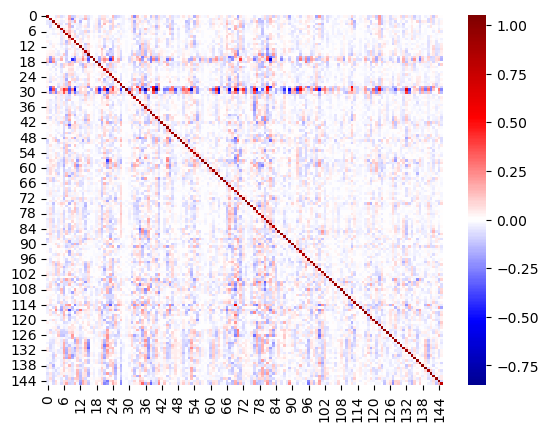

In [56]:
mean_a = np.mean(results["A_mats"][...,A_mask],axis=-1)
sns.heatmap(mean_a,cmap='seismic',center=0)


<Axes: >

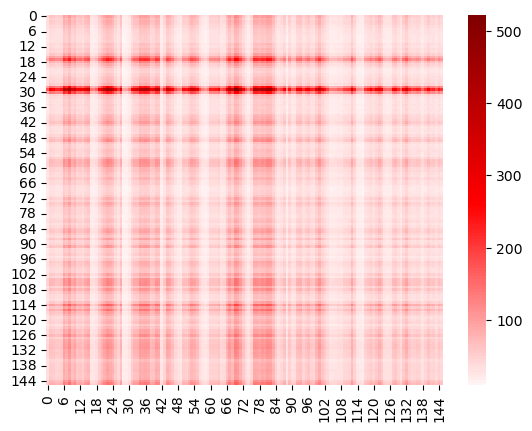

In [64]:
rownorm = np.sum(np.abs(mean_a),axis=1)
rownorm = np.expand_dims(rownorm, axis=-1)

colnorm = np.sum(np.abs(mean_a),axis=0)
colnorm = np.expand_dims(colnorm, axis=-1)


d = rownorm.dot(colnorm.T)
sns.heatmap(d,cmap='seismic',center=0)


In [20]:
np.sum(np.square(window[:-1,:] - A.dot(window[:-1,:].T).T))

1.753549018629314e-05

In [27]:
# loop through all windows and calculate the error
errors = []
ws=[]
zs=[]
for i in tqdm(range(results["A_mats"].shape[0])):
    A = results["A_mats"][...,i]
    window = data[:, sample_points[i, 0] : sample_points[i, 1]].T
    z = A.dot(window[:-1,:].T).T
    w = window[:-1,:]
    ws.append(w)
    zs.append(z)
    error = np.sum(np.square(w - z))
    errors.append(error)
ws = np.array(ws)
zs = np.array(zs)

100%|██████████| 146/146 [00:00<00:00, 1382.30it/s]


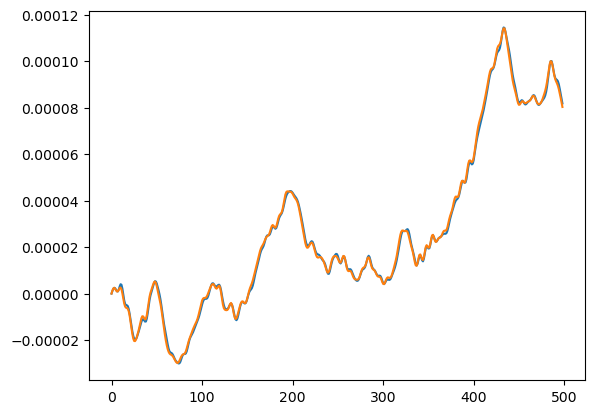

In [32]:
plt.plot(ws[0,:,0])
plt.plot(zs[0,:,0])

In [ ]:
plt.plot(ws[0,:,0])

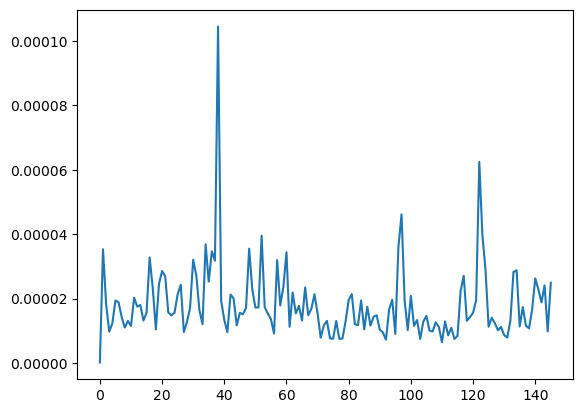

In [24]:
plt.plot(errors)

R'5
R'6
R'7
R'8
R'9
R'10
S'1


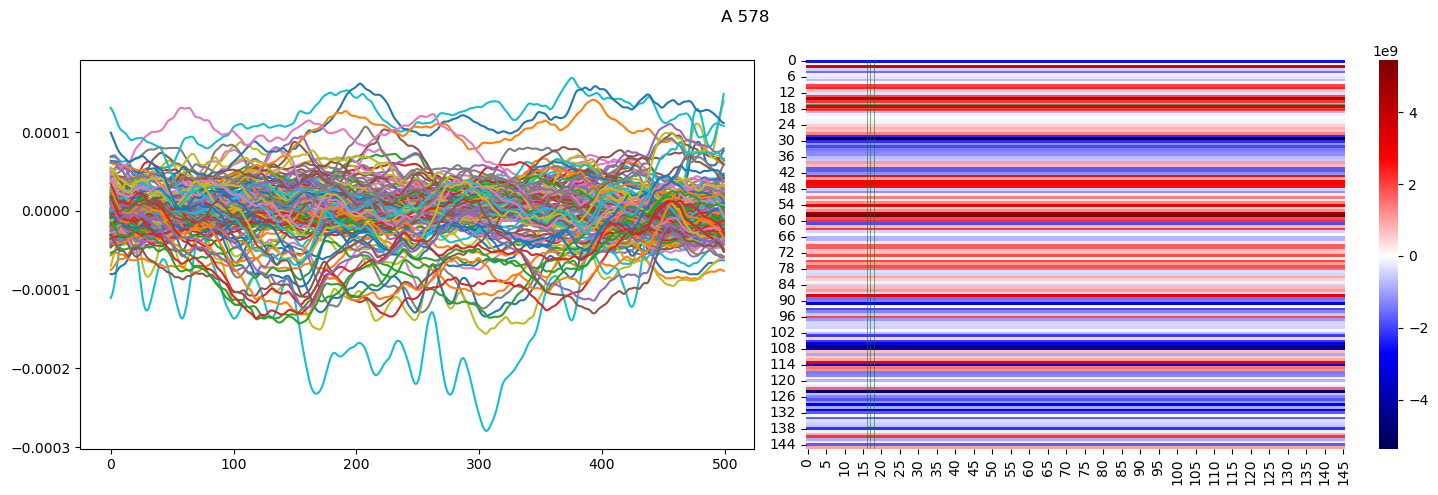

In [46]:
idx = 578

window = data[:, sample_points[idx, 0] : sample_points[idx, 1]].T

A = results['A_mats'][...,idx]

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax.flat[0].plot(window)

sns.heatmap(A,cmap='seismic',center=0,ax=ax.flat[1])

# plot a thin line for the soz
soz = results["soz"]
for i in range(len(soz)):
    if soz[i] == 1:
        c=  'g'
        ax.flat[1].axvline(i+.5, color=c, lw=0.4)
        ax.flat[1].axhline(i+.5, color=c, lw=0.4)

    if i >=108 and i <=114:
        print(channels[i])

fig.suptitle(f"A {idx}")
fig.tight_layout()


In [3]:
# sec to window binning (2 window per second)
arr = {}
for x in range(results['A_mats'].shape[-1]):
    seconds = x//2
    if seconds not in arr:
        arr[seconds] = []
    arr[seconds].append(x)

In [5]:
# for idx in tqdm(range(results['A_mats'].shape[-1])):
#     window = data[:, sample_points[idx, 0] : sample_points[idx, 1]].T

#     A = results['A_mats'][...,idx]

#     fig,ax = plt.subplots(1,2, figsize=(15,5))
#     ax.flat[0].plot(window)

#     sns.heatmap(A,cmap='seismic',center=0,ax=ax.flat[1])

#     # plot a thin line for the soz
#     soz = results["soz"]
#     for i in range(len(soz)):
#         if soz[i] == 1:
#             c=  'g'
#             ax.flat[1].axvline(i+.5, color=c, lw=0.4)
#             ax.flat[1].axhline(i+.5, color=c, lw=0.4)

#     fig.suptitle(f"A {idx}")
#     fig.tight_layout()

#     plt.savefig(f"{idx:05}.png")
#     plt.close()


100%|██████████| 605/605 [06:19<00:00,  1.60it/s]


In [7]:
from scipy.io import savemat

# Create a dictionary of data to save
data_dict = {
    "data": data,
    "sample_points": sample_points,
    "A_mats": results['A_mats'],
    "soz": results["soz"]
}

# Save as a .mat file
savemat('data.mat', data_dict)


In [8]:
# print out the shape and type of each array in the dictionary
for key, value in data_dict.items():
    print(f"Key: {key}")
    print(f"Shape: {value.shape}")
    print(f"Type: {value.dtype}")

Key: data
Shape: (146, 620032)
Type: float64
Key: sample_points
Shape: (1240, 2)
Type: int64
Key: A_mats
Shape: (146, 146, 605)
Type: float64
Key: soz
Shape: (146,)
Type: int32
